# Tasks

- Task 1  [10 Points]: Work with Mnist dataset
    - Perform proper preprocessing and visualization
    - Perform proper hyperparameter tuning **-SVM-**. JUSTIFY ALL THE HYPERPARAMETER VALUES


* Task 2 (Bouns) [3 Points] : Follow [this tutorial](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn) on **Naive Bayes** and apply what you learnt on the [Spam Classification dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)



**Task 1**

Importing

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from keras.datasets import mnist

In [ ]:
import pandas as pd

import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

Intro

In [ ]:
#the dataset exists in many places; sklearn, keras, and online with different qualities,
#so make sure to check the size first
digits = datasets.load_digits()
#or uncomment the following to use keras data
#(X_train, y_train), (X_test, y_test) = mnist.load_data()


Preprocessing

In [ ]:
#Getting data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#getting some information about data
print("x train:", X_train.shape)
print("y train:", y_train.shape)
print("x test:", X_test.shape)
print("x test:", y_test.shape)
print("x train max",X_train.max())
print("x train min",X_train.min())
print("y train max",y_train.max())
print("y train min",y_train.min())
#make each image in a row
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
#scaling to have range of [0:1]
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0
#getting less data for time
X_train_less = X_train_scaled[0:1000,:]
X_test_less = X_test_scaled[0:200,:]
y_train_less = y_train[0:1000]
y_test_less = y_test[0:200]

11490434/11490434 [==============================] - 1s 0us/step
x train: (60000, 28, 28)
y train: (60000,)
x test: (10000, 28, 28)
x test: (10000,)
x train max 255
x train min 0
y train max 9
y train min 0


Visualisation

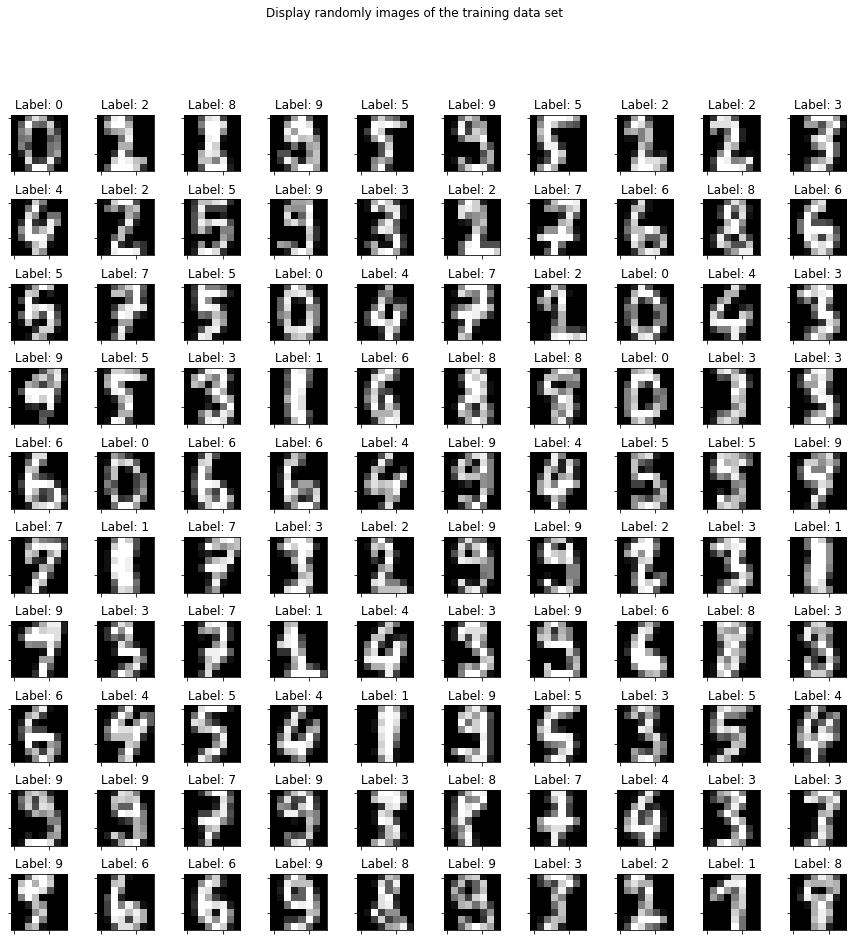

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    return tmp
data = displayData(digits.images,digits.target) 

Types of kernals (gamma = 0.01 % c = [0.1:0.2:20]

Linear

In [ ]:
svc=SVC(kernel='linear')
svc.fit(X_train_less,y_train_less)
y_pred=svc.predict(X_test_less)
print('Accuracy Score Linear:', str(metrics.accuracy_score(y_test_less,y_pred)*100) + '%')

Accuracy Score Linear: 92.5%


Accuracy: [0.883, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.8780000000000001, 0.

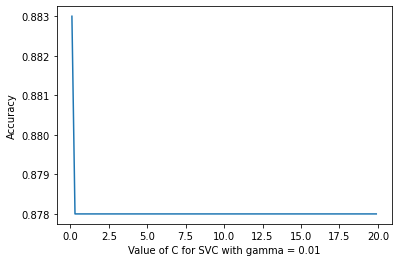

In [ ]:
g = 0.01
c_range = list(np.arange(0.1,20,0.2))
accuracy = []
for c in c_range:
  svc = SVC(kernel='linear', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
print("Accuracy:",accuracy)
plt.plot(c_range, accuracy)
plt.xlabel('Value of C for SVC with gamma = 0.01')
plt.ylabel('Accuracy');

Polynomial

In [ ]:
svc=SVC(kernel='poly')
svc.fit(X_train_less,y_train_less)
y_pred=svc.predict(X_test_less)
print('Accuracy Score Polynomial:', str(metrics.accuracy_score(y_test_less,y_pred)*100) + '%') 

Accuracy Score Polynomial: 88.0%


Accuracy: [0.525, 0.726, 0.7729999999999999, 0.7999999999999999, 0.806, 0.8220000000000001, 0.8390000000000001, 0.8480000000000001, 0.851, 0.8540000000000001, 0.853, 0.8560000000000001, 0.8629999999999999, 0.8659999999999999, 0.8709999999999999, 0.873, 0.873, 0.873, 0.874, 0.875, 0.8790000000000001, 0.8780000000000001, 0.8780000000000001, 0.8790000000000001, 0.8800000000000001, 0.881, 0.881, 0.882, 0.883, 0.882, 0.883, 0.8870000000000001, 0.8880000000000001, 0.889, 0.8869999999999999, 0.8869999999999999, 0.8879999999999999, 0.8879999999999999, 0.889, 0.889, 0.889, 0.889, 0.889, 0.889, 0.89, 0.89, 0.89, 0.89, 0.891, 0.891, 0.891, 0.89, 0.89, 0.89, 0.89, 0.89, 0.891, 0.891, 0.891, 0.891, 0.891, 0.891, 0.891, 0.891, 0.891, 0.89, 0.89, 0.89, 0.89, 0.89, 0.8870000000000001, 0.8870000000000001, 0.8870000000000001, 0.8860000000000001, 0.8860000000000001, 0.8860000000000001, 0.885, 0.885, 0.885, 0.885, 0.885, 0.884, 0.884, 0.883, 0.883, 0.882, 0.882, 0.882, 0.882, 0.882, 0.882, 0.883, 0.883, 0

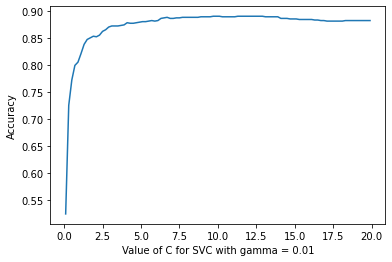

In [ ]:
g = 0.01
c_range = list(np.arange(0.1,20,0.2))
accuracy = []
for c in c_range:
  svc = SVC(kernel='poly', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
print("Accuracy:",accuracy)
plt.plot(c_range, accuracy)
plt.xlabel('Value of C for SVC with gamma = 0.01')
plt.ylabel('Accuracy');

RBF

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(X_train_less,y_train_less)
y_pred=svc.predict(X_test_less)
print('Accuracy Score RBF:', str(metrics.accuracy_score(y_test_less,y_pred)) + '%')

Accuracy Score RBF: 0.93%


Accuracy: [0.7839999999999999, 0.869, 0.8799999999999999, 0.89, 0.9, 0.9049999999999999, 0.909, 0.9109999999999999, 0.9119999999999999, 0.9139999999999999, 0.9139999999999999, 0.9149999999999998, 0.9129999999999999, 0.913, 0.913, 0.913, 0.914, 0.914, 0.914, 0.914, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914]


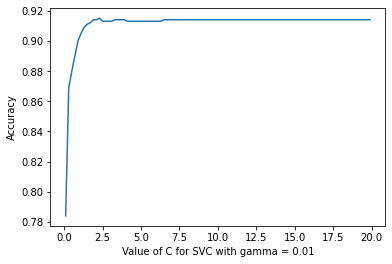

In [ ]:
g = 0.01
c_range = list(np.arange(0.1,20,0.2))
accuracy = []
for c in c_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
print("Accuracy:",accuracy)
plt.plot(c_range, accuracy)
plt.xlabel('Value of C for SVC with gamma = 0.01')
plt.ylabel('Accuracy');

->According to the accuracies, RBF is the best kernal, so I will use it.

RBF:

Sweeping on c and zooming (gamma = 0.1)

Let's zoom at c = [0.1:0.1:5.0] area

Accuracy: [0.7839999999999999, 0.8549999999999999, 0.869, 0.876, 0.8799999999999999, 0.8870000000000001, 0.89, 0.8969999999999999, 0.9, 0.9029999999999999, 0.9049999999999999, 0.907, 0.909, 0.909, 0.9109999999999999, 0.9129999999999999, 0.9119999999999999, 0.9129999999999999, 0.9139999999999999, 0.9139999999999999, 0.9139999999999999, 0.9149999999999998, 0.9149999999999998, 0.9139999999999999, 0.9129999999999999, 0.915, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.914, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913, 0.913]


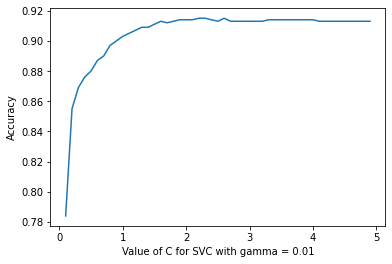

In [ ]:
g = 0.01
c_range = list(np.arange(0.1,5,0.1))
accuracy = []
for c in c_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
print("Accuracy:",accuracy)
plt.plot(c_range, accuracy)
plt.xlabel('Value of C for SVC with gamma = 0.01')
plt.ylabel('Accuracy');

Let's zoom at c = [2:0.1:5] area

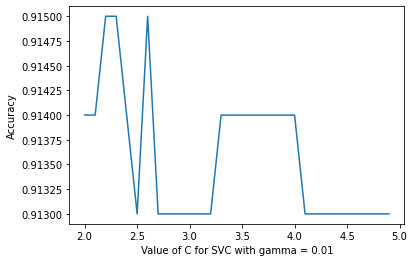

In [ ]:
g = 0.01
c_range = list(np.arange(2,5,0.1))
accuracy = []
for c in c_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
plt.plot(c_range, accuracy)
plt.xlabel('Value of C for SVC with gamma = 0.01')
plt.ylabel('Accuracy');

Let's zoom at c = [2:0.01:5] area

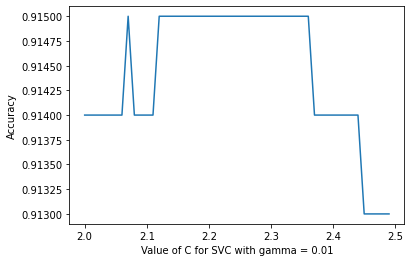

In [ ]:
g = 0.01
c_range = list(np.arange(2,2.5,0.01))
accuracy = []
for c in c_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
plt.plot(c_range, accuracy)
plt.xlabel('Value of C for SVC with gamma = 0.01')
plt.ylabel('Accuracy');

->According to the accuracies, the best c = 2.3, so I will use it.

Sweeping on gamma and zooming (c = 2.3)

Let's zoom at g = [2:0.01:5] area

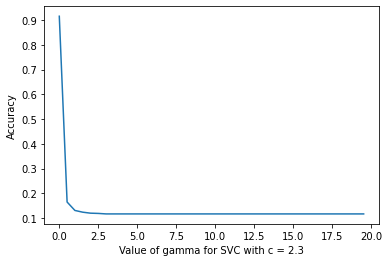

In [ ]:
c = 2.3
g_range = list(np.arange(0.01,20,0.5))
accuracy = []
for g in g_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
plt.plot(g_range, accuracy)
plt.xlabel('Value of gamma for SVC with c = 2.3')
plt.ylabel('Accuracy');

Let's zoom at g = [0.0001:0.1:2.5] area

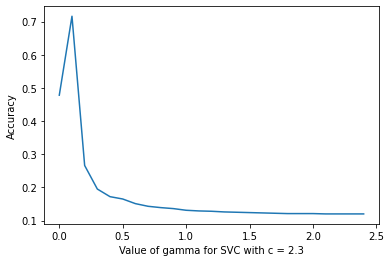

In [ ]:
c = 2.3
g_range = list(np.arange(0.0001,2.5,0.1))
accuracy = []
for g in g_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
plt.plot(g_range, accuracy)
plt.xlabel('Value of gamma for SVC with c = 2.3')
plt.ylabel('Accuracy');

Let's zoom at g = [0.0001:0.01:0.3] area

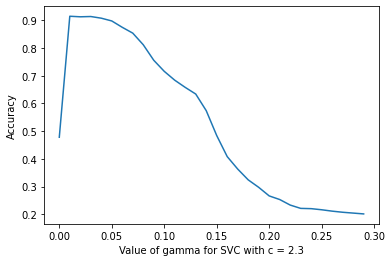

In [ ]:
c = 2.3
g_range = list(np.arange(0.0001,0.3,0.01))
accuracy = []
for g in g_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
plt.plot(g_range, accuracy)
plt.xlabel('Value of gamma for SVC with c = 2.3')
plt.ylabel('Accuracy');

Let's zoom at g = [0.0001:0.001:0.05] area

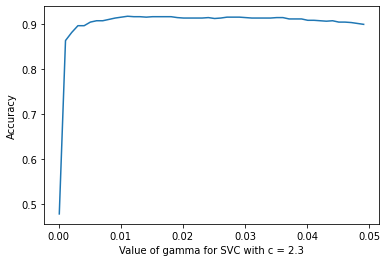

In [ ]:
c = 2.3
g_range = list(np.arange(0.0001,0.05,0.001))
accuracy = []
for g in g_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
plt.plot(g_range, accuracy)
plt.xlabel('Value of gamma for SVC with c = 2.3')
plt.ylabel('Accuracy');

Let's zoom at g = [0.01:0.001:0.02] area

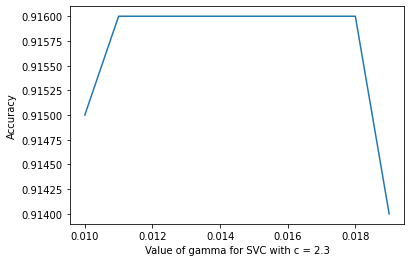

In [ ]:
c = 2.3
g_range = list(np.arange(0.01,0.02,0.001))
accuracy = []
for g in g_range:
  svc = SVC(kernel='rbf', C=c, gamma = g)
  score = cross_val_score(svc, X_train_less, y_train_less, cv=10, scoring='accuracy')
  score_mean = score.mean()
  accuracy.append(score_mean)
plt.plot(g_range, accuracy)
plt.xlabel('Value of gamma for SVC with c = 2.3')
plt.ylabel('Accuracy');

->According to the accuracies, the best g = 0.015, so I will use it.



Using RBF (c=2.3, gamma = 0.015)

In [ ]:
c = 2.3
g = 0.015
svc = SVC(kernel='rbf', C=c, gamma = g)
svc.fit(X_train_less,y_train_less)
predict = svc.predict(X_test_less)
counter = 0.0
length = len(y_test_less)
for i in range(length):
  if y_test_less[i]!=predict[i]:
    counter += counter
error_percentage = counter/length*100
print("Error percentage:", str(error_percentage)+'%')

Error percentage: 0.0%


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**Task 2 (Bonus)**

Importing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

Getting data

In [ ]:
spam = pd.read_csv("/content/spam.csv", encoding='latin-1')
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Some information about data

In [ ]:
print("Number of duplicates:", spam.duplicated().sum())

Number of duplicates: 403


In [ ]:
spam.drop_duplicates(inplace=True)

Visulaization for spam and ham data

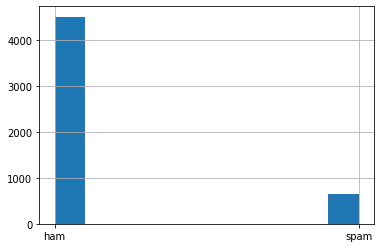

In [ ]:
spam['v1'].hist()

Preprocessing for this data

In [ ]:
#preprocessing
spam['v1'].replace({"ham":1, "spam":0}, inplace = True)
x_spam = spam['v2']
y_spam = spam['v1']

In [ ]:
#fitting data
temp_spam = TfidfVectorizer()
temp_spam.fit(x_spam)
x_spam = temp_spam.fit_transform(x_spam)

In [ ]:
#splitting data
x_spam_train , x_spam_test , y_spam_train , y_spam_test = train_test_split(x_spam, y_spam, test_size = 0.1 , random_state = 10)

Applying Naive Bayes

In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(x_spam_train.toarray(), y_spam_train)
#Predict the response for test dataset
y_spam_pred = gnb.predict(x_spam_test.toarray())

In [ ]:
print("Accuracy:", str(metrics.accuracy_score(y_spam_test, y_spam_pred)*100)+'%')

Accuracy: 88.78143133462282%
